In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# load the Pima indian diabetes dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(url)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# define X and y
feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label

In [46]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [47]:
X_train.shape, X_test.shape

((576, 7), (192, 7))

In [48]:
# train a knn model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
# make class predictions for the testing set
y_test_pred = knn_clf.predict(X_test)

In [50]:
# print the first 30 true and predicted responses
print('True:',y_test.to_numpy()[0:30])
print('Pred:',y_test_pred[0:30])

True: [1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1]
Pred: [1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0]


In [51]:
from sklearn import metrics

In [52]:
print(100*metrics.accuracy_score(y_test, y_test_pred))

73.4375


### The Confusion Matrix

In [53]:
C = print(metrics.confusion_matrix(y_test,y_test_pred))

[[103  21]
 [ 30  38]]


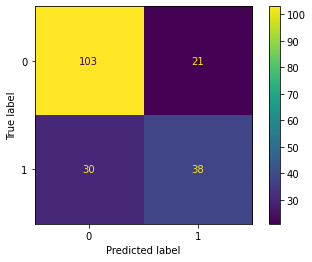

In [54]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_clf,X_test,y_test)

In [55]:
from sklearn.model_selection import cross_val_score as cvs

In [56]:
scores = cvs(knn_clf,X,y,cv=10,scoring='accuracy')
scores

array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
       0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.73684211])

In [57]:
scores.mean()

0.7200615174299384

### Grid search: efficiently searching for optimal hyperparamaters

In [63]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


KNN is actually not the best model to use for this data because glucose has very high numbers and KNN uses distance, so it's basically just using glucose as the predictor rather than everything. 

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# matrix X and target vector Y 
X = pima.drop('label',axis=1)
y = pima.label

In [66]:
# train - test split 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [67]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
#evaluation of KNN model 
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
y_test_pred = knn_clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.6875
0.43661971830985913
0.6078431372549019


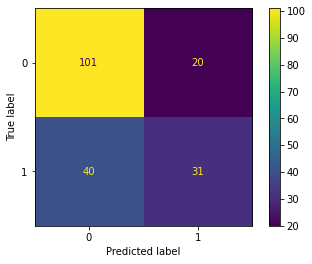

In [71]:
ConfusionMatrixDisplay.from_estimator(knn_clf,X_test,y_test)
# stop at dot and press tab to see options

- Recall = $\frac{TP}{TP+FN}$
    - low score means a lot of false negatives, so use if you care about FN 
- Precision = $\frac{TP}{TP+FP}$
    - low score means a lot of false positives, so use if you care about FN
- the model above has a lot of false positives. Since the model is diagnosing diabetes, a false positive and a false negative is not good. As a general rule if the score you care about is .5 or lower, you should try a different model 
- If we use rows (x) as the actual value and columns (y) as predicted values using (x,y), then 
    - (1,1) is true positive
    - (1,0) is false negative 
    - (0,1) is false positive 
    - (0,0) is true positive 

In [58]:
#define hyperparameter values that should be searched 
k_range = list(range(1,51))

In [59]:
#create a hyperparameter dictionary
grid_dic = {'n_neighbors':k_range, 'weights':['uniform','distance']}

In [60]:
#change n_neighbors param 
knn_clf.n_neighbors = 5

n_jobs=-1 : uses all your CPUs

In [85]:
from sklearn.model_selection import GridSearchCV 
#GridSearchCV(knn_clf,grid_dic,cv = 10,scoring='accuracy',verbose=1,n_jobs=1)
grid = GridSearchCV(knn_clf,grid_dic,cv=10,scoring='precision',n_jobs=-1,verbose=1)

In [86]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='precision', verbose=1)

In [87]:
#grid search results
grid.cv_results_

{'mean_fit_time': array([0.00634823, 0.0063252 , 0.00802081, 0.00629625, 0.00642402,
        0.00556297, 0.00666609, 0.00755637, 0.        , 0.00499208,
        0.00220413, 0.00632432, 0.00392554, 0.00925572, 0.00253527,
        0.0031251 , 0.00485084, 0.00254831, 0.00322888, 0.00156395,
        0.00390339, 0.00560038, 0.00354817, 0.00388405, 0.00906403,
        0.0055438 , 0.00338345, 0.00312517, 0.003564  , 0.0056227 ,
        0.00392556, 0.0058001 , 0.00449739, 0.00471547, 0.00546968,
        0.00754478, 0.00742524, 0.00781381, 0.00345292, 0.00559032,
        0.00400712, 0.00423715, 0.00473311, 0.00657272, 0.00786998,
        0.00316293, 0.00564919, 0.00797143, 0.00472889, 0.00425224,
        0.00399966, 0.00471492, 0.00386889, 0.00498064, 0.00412858,
        0.00400023, 0.00790176, 0.00802095, 0.00468969, 0.00415859,
        0.00457535, 0.00625052, 0.0018229 , 0.00569091, 0.00561562,
        0.00632565, 0.0035744 , 0.00474772, 0.00382802, 0.00312428,
        0.00680833, 0.00156426,

In [88]:
#see column names 
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [89]:
#default view is not friendly, use pandas to make it a dataframe
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.503707,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.503707,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.688084,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.503707,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.584798,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...
95,0.752577,"{'n_neighbors': 48, 'weights': 'distance'}"
96,0.713533,"{'n_neighbors': 49, 'weights': 'uniform'}"
97,0.758895,"{'n_neighbors': 49, 'weights': 'distance'}"
98,0.741606,"{'n_neighbors': 50, 'weights': 'uniform'}"


In [90]:
# best hyperparameters
grid.best_params_

{'n_neighbors': 28, 'weights': 'uniform'}

In [91]:
#best score 
grid.best_score_

0.7728554778554779

In [92]:
# best knn classifier 
best_knn_clf = grid.best_estimator_

In [93]:
#finally, test best knn classifier 
y_test_pred = best_knn_clf.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.6875
0.30985915492957744
0.6666666666666666


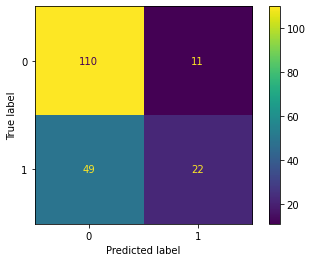

In [95]:
ConfusionMatrixDisplay.from_estimator(best_knn_clf,X_test,y_test)
